In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [104]:
df_1 = pd.read_csv('./data/train.csv')
df_2 = pd.read_csv('./data/test.csv')
# df_1 = df_1[0:-1]

if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis=0)
df = df.set_index('Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0


In [105]:
df_numeric = df[df.select_dtypes(include={"int", "float"}).columns]
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000


<Axes: ylabel='Id'>

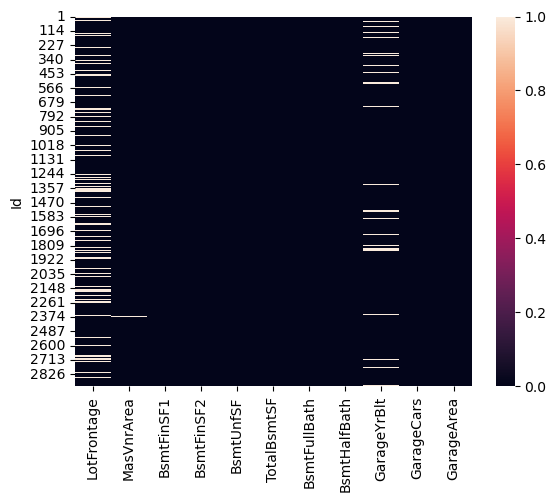

In [106]:
df_numeric_null = df_numeric[df_numeric.isna().sum()[df_numeric.isna().sum() > 0].index]
sns.heatmap(df_numeric_null.isna())

In [107]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea'] 

for col in Mode_columns:
    df_numeric[col] = df_numeric[col].fillna(df_numeric[col].mode()[0])
for col in Mean_columns:
    df_numeric[col] = df_numeric[col].fillna(df_numeric[col].mean())

df_numeric.head()

C:\Users\ASROCK\AppData\Local\Temp\ipykernel_28484\230173993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[col] = df_numeric[col].fillna(df_numeric[col].mode()[0])
C:\Users\ASROCK\AppData\Local\Temp\ipykernel_28484\230173993.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[col] = df_numeric[col].fillna(df_numeric[col].mean())


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000


In [108]:
df_numeric.isna().sum().max()

0

In [109]:
df_object = df[df.select_dtypes('object').columns]
df_object.isna().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Exterior1st         1
SaleType            1
KitchenQual         1
Electrical          1
RoofStyle           0
HouseStyle          0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
Foundation          0
Street              0
RoofMatl            0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SaleCondition       0
dtype: int64

<Axes: ylabel='Id'>

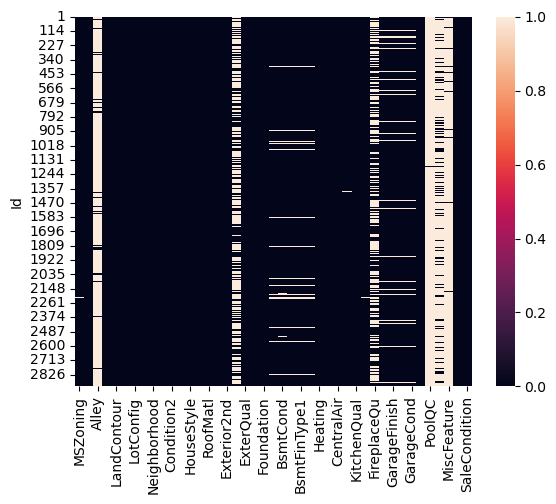

In [110]:
sns.heatmap(df_object.isna())

In [111]:
df_object = df_object.fillna('null')
df_object_encoded = pd.get_dummies(df_object, dtype=int)
df_object_encoded

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2916,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2917,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [112]:
for col in df_object_encoded.columns:
    if "null" in col:
        df_object_encoded = df_object_encoded.drop(col, axis=1)
        print(col)

MSZoning_null
Alley_null
Utilities_null
Exterior1st_null
Exterior2nd_null
MasVnrType_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
FireplaceQu_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
PoolQC_null
Fence_null
MiscFeature_null
SaleType_null


In [113]:
df_object_encoded.isna().sum().max()

0

In [114]:
len(df_1), len(df_2), len(df_1)+len(df_2)

(1460, 1459, 2919)

In [115]:
merged_df = pd.concat([df_numeric, df_object_encoded], axis=1)
merged_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0


In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [123]:
half = int(len(df_1)/2)
training_data = merged_df[0:len(df_1)]
testing_data = merged_df[len(df_1):]
testing_data = testing_data.drop(columns="SalePrice")

training_data = training_data[0:len(df_1)]
X = training_data.drop(columns='SalePrice')
y = training_data[['SalePrice']]

len(training_data), len(testing_data), len(X), len(y)


(1460, 1459, 1460, 1460)

In [156]:
model = XGBRegressor()
score = cross_val_score(model, X, y, cv=KFold(n_splits=5, shuffle=True))
score.mean(), score

(0.8581489443778991,
 array([0.8611024 , 0.79864609, 0.89447838, 0.90295017, 0.83356768]))

In [153]:
model = LinearRegression()
score = cross_val_score(model, X, y, cv=KFold(n_splits=5, shuffle=True))
score.mean(), score

(0.7012347384462262,
 array([0.76020076, 0.63088434, 0.87409395, 0.90016003, 0.3408346 ]))

In [174]:
X = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))
X_train.shape, y_train.shape

((1168, 287), (1168, 1))

In [184]:
linear_model = LinearRegression()
linear_model.fit(X,y)
y_pred = linear_model.predict(X_test)
mean_squared_error(y_test, y_pred)

584283405.2068715

In [185]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb_model.fit(X,y)
y_pred = xgb_model.predict(X_test)
mean_squared_error(y_test, y_pred)

5637.47140445448

In [188]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X,y)
y_pred = rf_model.predict(X_test)
mean_squared_error(y_test, y_pred)

105584385.7117226

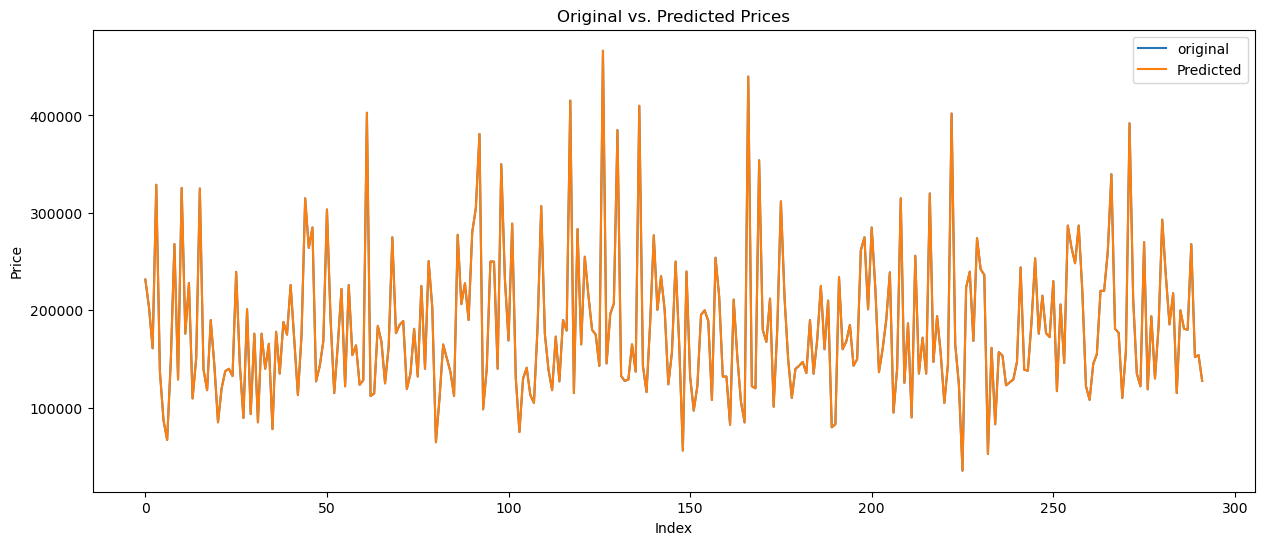

In [186]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(len(y_test)), y_test, label='original')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs. Predicted Prices')
plt.legend()
plt.show()